In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ** NCovert ACK Bounce Detection Using Naive Bayes **


In [2]:
# Two classes exist in this dataset: 1 and 0
# 1 = Covert packet
# 0 = Normal packet
dataset = pd.read_excel('Updated Final NCovert ACK Bounce Dataset.xlsx')
dataset.head(10)

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum,tcp.checksum.dec,class
0,0,0,1282372198,0,1,1,0x0000d7f7,55287,1
1,0,0,1830840689,0,1,1,0x0000c03b,49211,1
2,0,0,1937075489,0,1,1,0x0000b636,46646,1
3,0,0,1685023856,0,1,1,0x0000c5ed,50669,1
4,0,0,1914729322,0,1,1,0x0000b142,45378,1
5,0,0,1948279150,0,1,1,0x0000c13e,49470,1
6,0,0,1702112289,0,1,1,0x00000538,1336,1
7,0,0,1668247156,0,1,1,0x0000c4e9,50409,1
8,0,0,1701016678,0,1,1,0x0000bd03,48387,1
9,0,0,1953853985,0,1,1,0x0000b036,45110,1


In [3]:
dataset.tail()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum,tcp.checksum.dec,class
100393,96772697,96775617,1403019886,0,1,0,0x0000cc15,52245,0
100394,1403019886,1403019886,96775617,0,1,0,0x0000c0ad,49325,0
100395,315884,315930,2611344961,0,1,0,0x0000f239,62009,0
100396,2611344961,2611344961,315930,0,1,0,0x00002cb2,11442,0
100397,313018,313057,4227248475,0,1,0,0x0000c738,51000,0


In [4]:
# Check if there are any nulls
dataset.isnull().sum(axis=0)
# No nulls detected

tcp.seq             0
tcp.nxtseq          0
tcp.ack             0
tcp.flags.syn       0
tcp.flags.ack       0
tcp.flags.reset     0
tcp.checksum        0
tcp.checksum.dec    0
class               0
dtype: int64

In [5]:
# Count the different types of packets
total_covert_packets = dataset [ dataset ['class'] == 1 ]
total_normal_packets = dataset [ dataset ['class'] == 0 ]
print(f'Total covert packets: {len(total_covert_packets)}')
print(f'Total normal packets: {len(total_normal_packets)}')

Total covert packets: 50199
Total normal packets: 50199


In [6]:
# Total packets in the dataset
print(len(dataset))

100398


In [7]:
# Right now the dataset contains hexadecimal values
# These must be dropped 
dataset = dataset.drop(['tcp.checksum'], axis=1)

In [8]:
dataset.head()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum.dec,class
0,0,0,1282372198,0,1,1,55287,1
1,0,0,1830840689,0,1,1,49211,1
2,0,0,1937075489,0,1,1,46646,1
3,0,0,1685023856,0,1,1,50669,1
4,0,0,1914729322,0,1,1,45378,1


In [9]:
dataset.tail()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum.dec,class
100393,96772697,96775617,1403019886,0,1,0,52245,0
100394,1403019886,1403019886,96775617,0,1,0,49325,0
100395,315884,315930,2611344961,0,1,0,62009,0
100396,2611344961,2611344961,315930,0,1,0,11442,0
100397,313018,313057,4227248475,0,1,0,51000,0


In [10]:
# Ready for data visualisation
import seaborn as sns

C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


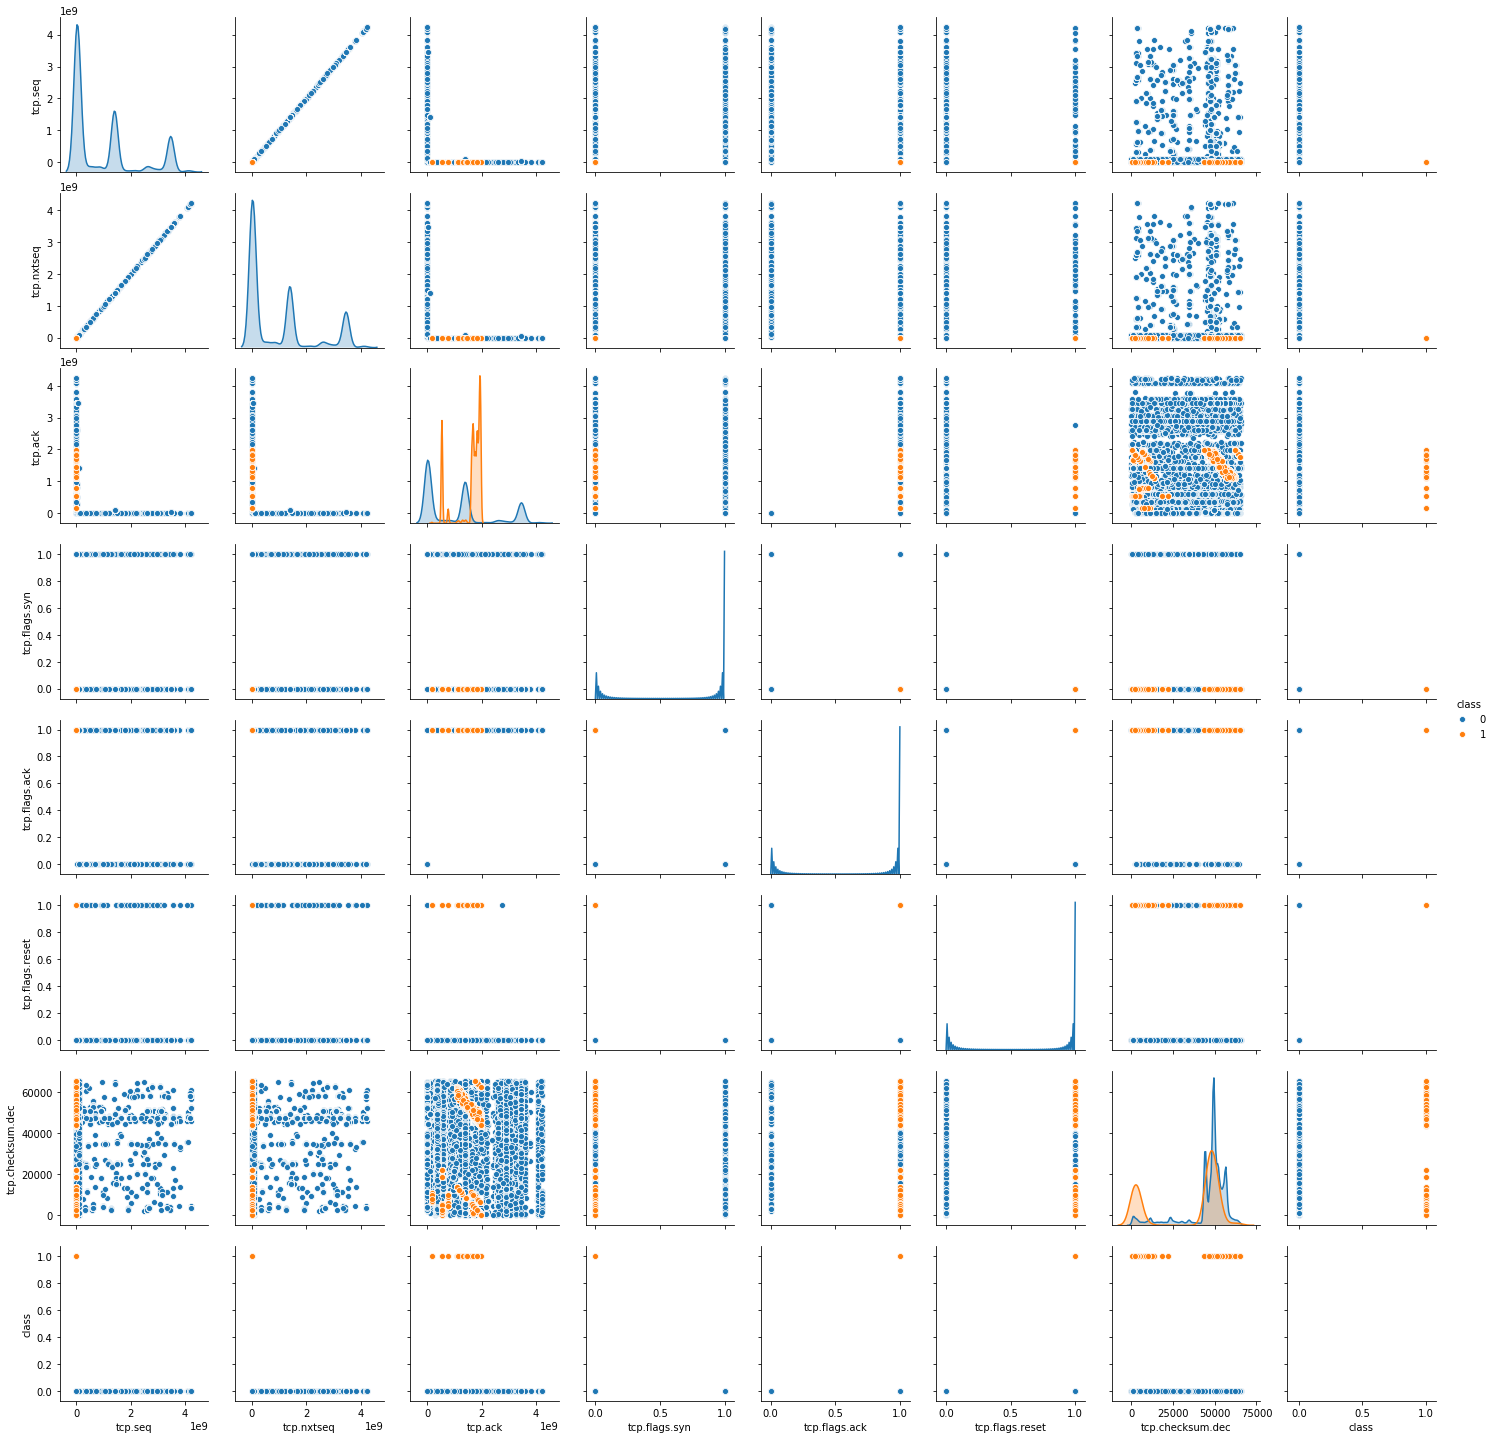

In [11]:
sns.pairplot(dataset, hue='class')

In [12]:
# Set the independent and dependent variables
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [13]:
# View the independent variables
X.head()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.flags.syn,tcp.flags.ack,tcp.flags.reset,tcp.checksum.dec
0,0,0,1282372198,0,1,1,55287
1,0,0,1830840689,0,1,1,49211
2,0,0,1937075489,0,1,1,46646
3,0,0,1685023856,0,1,1,50669
4,0,0,1914729322,0,1,1,45378


In [14]:
# Class
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [15]:
# Split the dataset into training and testing sets
# Stratify it so there is equal number of packets in the two classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [16]:
# Check the size the datasets
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(75298, 7)
(25100, 7)

(75298,)
(25100,)


In [17]:
# Scale the variables for faster computation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Use Naive Bayes to fit
from sklearn.naive_bayes import GaussianNB

In [19]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
# Predict the test data
y_predict = classifier.predict(X_test)
print(y_predict)

[1 0 1 ... 0 0 0]


In [21]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model score
score = classifier.score(X_test, y_test)
print(score, '%')

# Accuracy using the accuracy_score function from the sklearn.metrics
score = accuracy_score(y_test, y_predict)
print(score, '%')

# The quality of the predictions being made
report = classification_report(y_test, y_predict)
print(report)

# The confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

0.9999601593625498 %
0.9999601593625498 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12550
           1       1.00      1.00      1.00     12550

    accuracy                           1.00     25100
   macro avg       1.00      1.00      1.00     25100
weighted avg       1.00      1.00      1.00     25100

[[12549     1]
 [    0 12550]]


In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(classifier, X, y,cv=10, return_train_score=True)
print(f'KFold cross validation scores: {scores}')
avg = np.average(scores['test_score'])
print(f'Average score is {avg}')
print()

KFold cross validation scores: {'fit_time': array([0.02290392, 0.02094293, 0.02094507, 0.02393484, 0.02194142,
       0.02294016, 0.02590752, 0.02892113, 0.02992034, 0.02094316]), 'score_time': array([0.00201964, 0.00199485, 0.00199485, 0.00201964, 0.00199485,
       0.00199509, 0.00199509, 0.00299239, 0.00199485, 0.00199509]), 'test_score': array([0.9999004, 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       ]), 'train_score': array([1.        , 0.99998893, 0.99998893, 0.99998893, 0.99998893,
       0.99998893, 0.99998893, 0.99998893, 0.99998893, 0.99998893])}
Average score is 0.9999900398406375



AUC is 0.9999601593625498
[1. 0. 1. ... 0. 0. 0.]


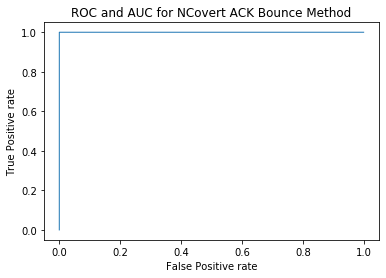

In [23]:
# Draw the ROC and AUC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities of the testing set
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f'AUC is {auc}')
plt.plot(fpr, tpr, linewidth=1)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC and AUC for NCovert ACK Bounce Method')
print(y_prob)

In [24]:
# Save the best model
import pickle
pickle.dump(classifier, open('ncovert_ack_bounce_nb_model', 'wb'))
trained_model = pickle.load(open('ncovert_ack_bounce_nb_model', 'rb'))
result_val = trained_model.score(X_train, y_train)
result_test = trained_model.score(X_test, y_test)
print(result_val)
print(result_test)

# Save the scaler too
from sklearn.externals.joblib import dump, load
dump(scaler, 'scaler_ncovert_ack_bounce_nb_model.bin', compress=True)
scaler_loaded = load('scaler_ncovert_ack_bounce_nb_model.bin')

1.0
0.9999601593625498


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
